### Import Useful Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import shap
%matplotlib inline
import ml_pipeline

### Load the Dataset 

In [2]:
dataset = pd.read_csv("Loan_data.csv")

In [3]:
print(dataset.shape)

(614, 13)


In [4]:
ml_pipeline.check_missing_data(dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


None

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Columns with missing data:
Gender: 13 missing rows
Married: 3 missing rows
Dependents: 15 missing rows
Self_Employed: 32 missing rows
LoanAmount: 22 missing rows
Loan_Amount_Term: 14 missing rows
Credit_History: 50 missing rows


### Check for Missing Data and Data Inconsistencies

In [5]:
dataset.apply(lambda x: sum(x.isnull()))

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Text(0, 0.5, 'Frequency')

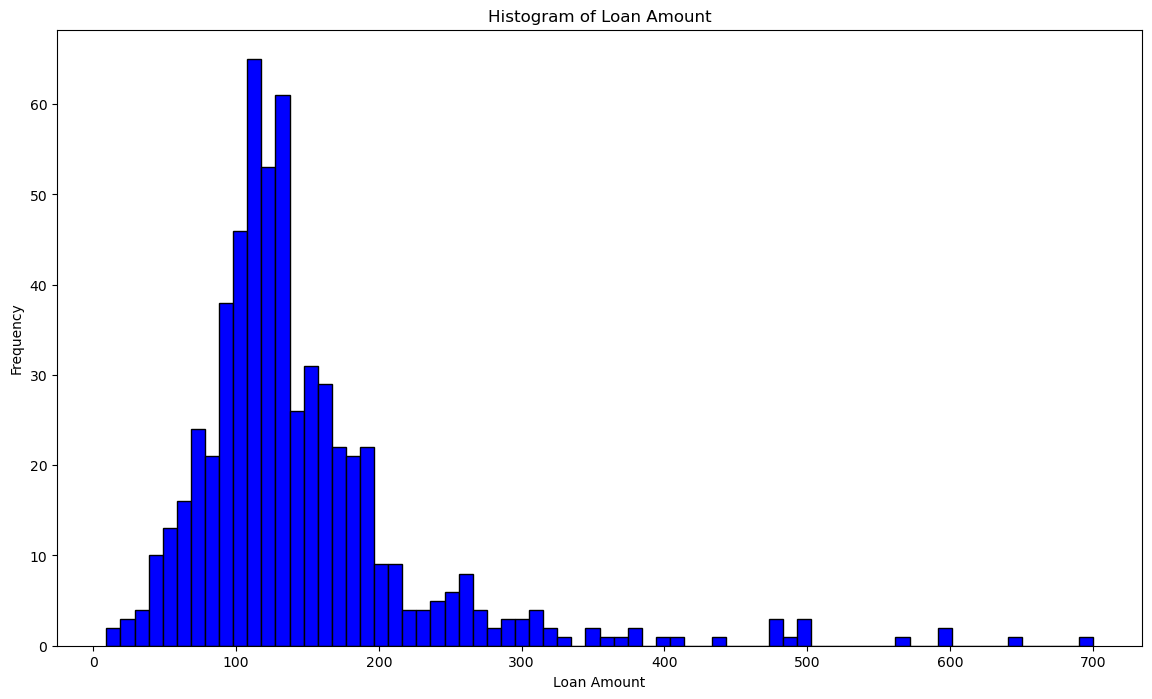

In [6]:
plt.figure(figsize=(14,8))
plt.hist(dataset['LoanAmount'].dropna(), color = 'blue', edgecolor = 'black',
         bins = int(700/10))
plt.title('Histogram of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

<Axes: xlabel='LoanAmount', ylabel='Count'>

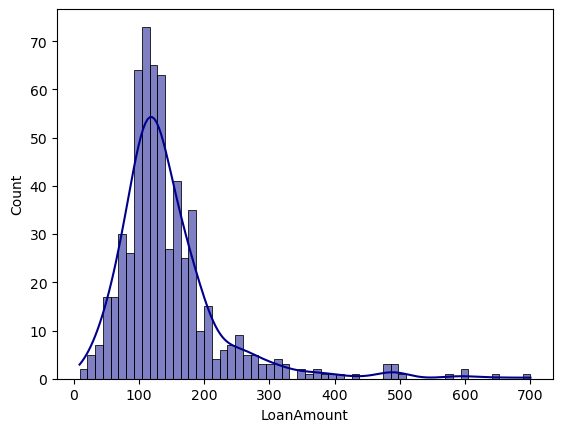

In [7]:
# Density Plot and Histogram of the loan amount
sns.histplot(dataset['LoanAmount'].dropna(), kde=True, bins=int(700/12), color = 'darkblue')

### Data Cleaning

In [8]:
df_filled = ml_pipeline.replace_missing_data(dataset, 'median')
df_filled.apply(lambda x: sum(x.isnull()))

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

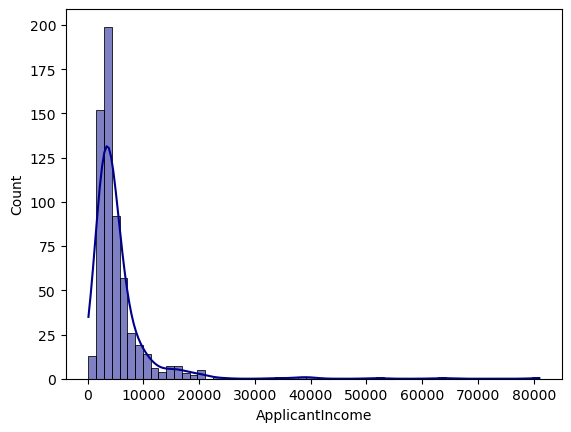

In [9]:
# Density Plot and Histogram of ApplicantIncome
sns.histplot(df_filled['ApplicantIncome'].dropna(), kde=True, bins=int(700/12), color = 'darkblue')

In [10]:
df_filled.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


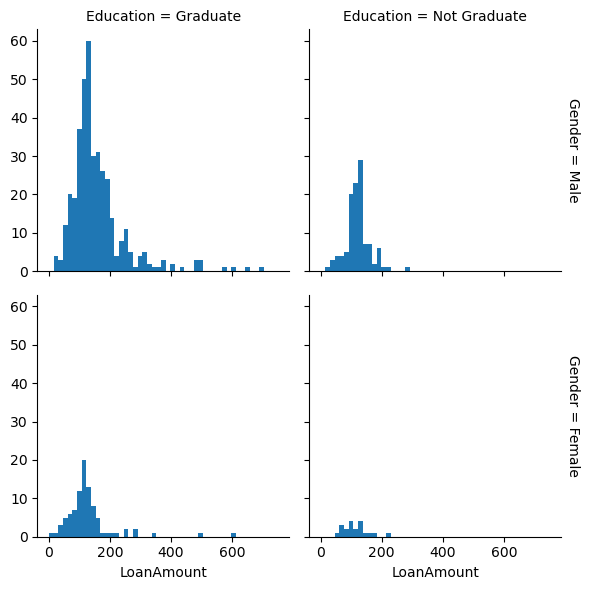

In [11]:
grid = sns.FacetGrid(df_filled, row="Gender", col="Education", margin_titles=True)
grid.map(plt.hist, "LoanAmount", bins=np.linspace(0, 750, 50));

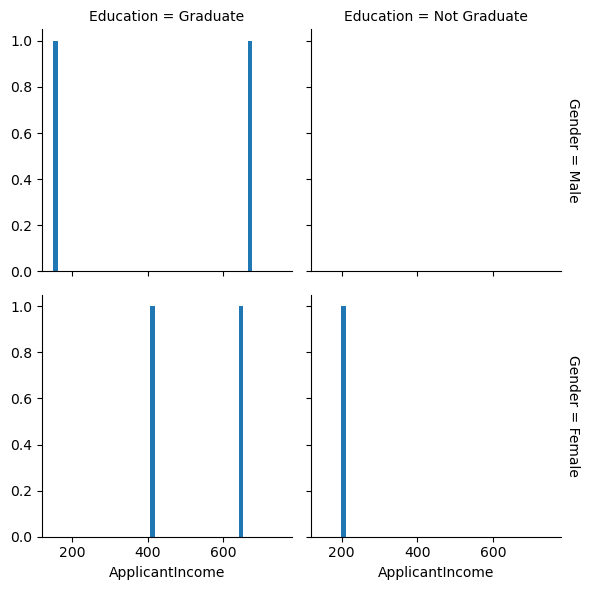

In [12]:
grid = sns.FacetGrid(df_filled, row="Gender", col="Education", margin_titles=True)
grid.map(plt.hist, "ApplicantIncome", bins=np.linspace(150, 750, 50));

### Changing Data Types

In [13]:
#changing credit history to object
df_filled['Credit_History'] = df_filled.Credit_History.astype(object)

In [14]:
df_filled.Credit_History.dtypes

dtype('O')

### Dropping Unwanted Columns

In [15]:
columns_to_drop = ['Loan_ID']
df_filled = ml_pipeline.drop_columns(df_filled, columns_to_drop)
df_filled.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
df_filled.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Scaling and Encoding the Data

In [17]:
processed_df = ml_pipeline.encode_categorical_features(ml_pipeline.scale_numerical_features(df_filled, 'Loan_Status'))
processed_df.head()

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0.072991,-0.554487,-0.211241,0.273231,1,0,0,0,0,0,0,1,0,1,1
1,-0.134412,-0.038732,-0.211241,0.273231,1,1,1,0,0,0,0,1,0,0,0
2,-0.393747,-0.554487,-0.948996,0.273231,1,1,0,0,0,0,1,1,0,1,1
3,-0.462062,0.251980,-0.306435,0.273231,1,1,0,0,0,1,0,1,0,1,1
4,0.097728,-0.554487,-0.056551,0.273231,1,0,0,0,0,0,0,1,0,1,1


### Splitting the Data

In [18]:
train_data ,test_data = train_test_split(processed_df, test_size=0.4)

In [19]:
train_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
549,-0.428970,0.135011,-0.425428,0.273231,1,1,0,0,0,0,0,1,0,0,1
141,0.002218,-0.554487,0.264730,0.273231,1,0,0,0,0,0,0,1,0,1,1
346,-0.308067,0.550215,0.074341,0.273231,1,1,0,0,0,1,0,0,0,0,0
211,-0.323302,-0.126971,-0.211241,0.273231,1,1,0,0,1,0,0,0,1,0,0
97,-0.561341,-0.213500,-1.139385,0.273231,1,1,0,0,0,0,0,1,1,0,1


### Model Training

In [20]:
# Assuming you have a training dataset called `train_df` and the target feature is 'target_variable'

# Define the list of ML techniques to use
models = [DecisionTreeClassifier(),
          RandomForestClassifier(),
          LogisticRegression(),
          LinearDiscriminantAnalysis()]
# Add other techniques as desired

model_results = ml_pipeline.train_models(train_data, 'Loan_Status_Y', models, test_size=0.25, cv=10)

# Display the model results
model_results

,Model,Mean CV Accuracy,CV Accuracy Std,Accuracy,Precision,Recall,F1-Score,Confusion Matrix,Best Model
0,DecisionTreeClassifier,0.739153,0.076683,0.673913,0.660130,0.673913,0.664087,"[[13, 18], [12, 49]]",False
1,RandomForestClassifier,0.775397,0.055809,0.771739,0.806159,0.771739,0.736689,"[[11, 20], [1, 60]]",True
2,LogisticRegression,0.808333,0.044431,0.771739,0.830196,0.771739,0.730042,"[[10, 21], [0, 61]]",False
3,LinearDiscriminantAnalysis,0.811905,0.046717,0.771739,0.830196,0.771739,0.730042,"[[10, 21], [0, 61]]",False


In [27]:
best_model

RandomForestClassifier()

### Evaluation of the Best Model

  0%|          | 0/368 [00:00<?, ?it/s]

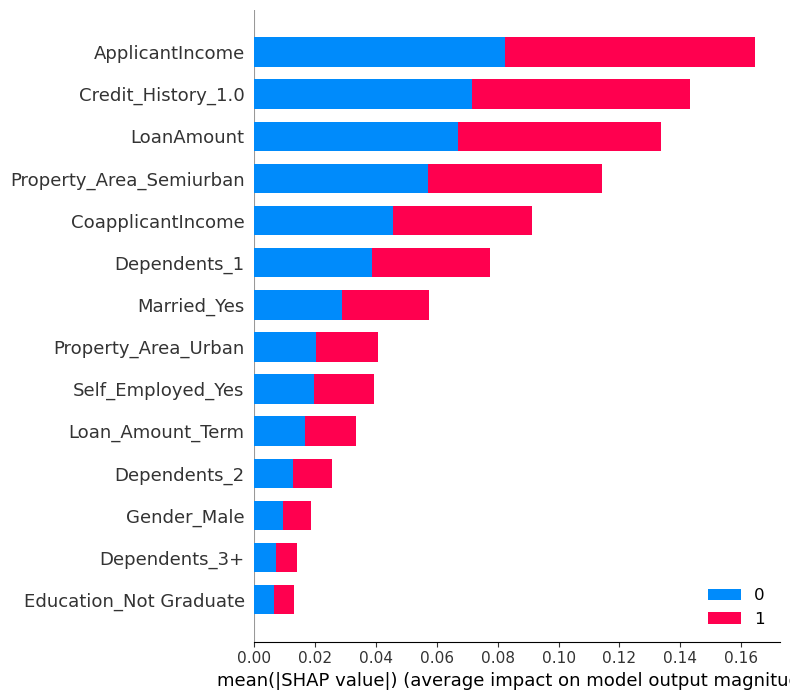

In [29]:
ml_pipeline.plot_best_model_explanation(results_df = model_results, models = models, trained_df = train_data, target_feature = 'Loan_Status_Y')

In [22]:
def get_best_model_features(results_df, models, trained_df, target_feature):
    
    # Retrieve the index of the best model
    best_model_idx = results_df[results_df['Best Model'] == True].index[0]

    # Retrieve the best model from the models list
    best_model = models[best_model_idx]

    # Extract the features from the trained_df (excluding the target_feature)
    features = trained_df.drop(target_feature, axis=1)

    # Fit the features into the best model
    best_model.fit(features, trained_df[target_feature])

    return best_model

In [23]:
best_model = get_best_model_features(results_df = model_results, models = models, trained_df = train_data, target_feature = 'Loan_Status_Y')

# Extract the features from the test dataset (excluding the target_feature)
test_features = test_data.drop('Loan_Status_Y', axis=1)

# Use the best model to make predictions on the test features
predictions = best_model.predict(test_features)

# Compare the predicted outcomes with the actual outcomes
actual_outcomes = test_data['Loan_Status_Y']
comparison = pd.DataFrame({'Actual': actual_outcomes, 'Predicted': predictions})
comparison


,Actual,Predicted
504,1,1
493,1,1
105,1,1
265,1,1
15,1,1
...,...,...
600,0,0
8,1,1
327,1,1
125,1,1


In [24]:
# Calculate and print the confusion matrix
confusion = confusion_matrix(actual_outcomes, predictions)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[ 39  38]
 [  9 160]]


Best Model Confusion matrix


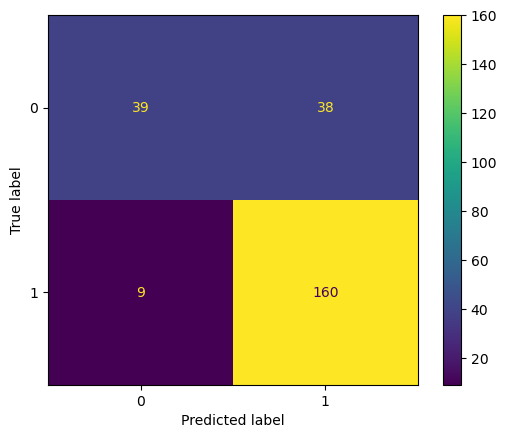

In [25]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
m_1_conf_metric =confusion_matrix(actual_outcomes, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=m_1_conf_metric)
print('Best Model Confusion matrix')
disp.plot()
plt.show()

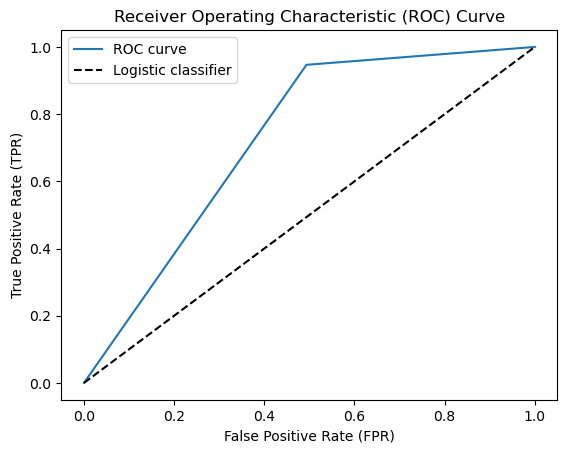

In [26]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(actual_outcomes, predictions)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Logistic classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### Saving the Best Model

In [36]:
# Assuming you have the best_model object obtained from the previous code
# Save the best model as a pickle file
pickle.dump(best_model, open('best_model.pkl', 'wb'))

### Calling the Best Model for Re-Use

In [ ]:
# Load the best model from the pickle file
loaded_model = pickle.load(open('best_model.pkl', 'rb'))

# Assuming you have the test dataset (test_df) and the target feature name (target_feature)

# Extract the features from the test dataset (excluding the target_feature)
test_features = test_data.drop('Loan_Status_Y', axis=1)

# Use the loaded model to make predictions on the test features
predictions = loaded_model.predict(test_features)

# Compare the predicted outcomes with the actual outcomes
actual_outcomes = test_data['Loan_Status_Y']
comparison = pd.DataFrame({'Actual': actual_outcomes, 'Predicted': predictions})

# Print the comparison
comparison